# Init

In [1]:
from dstools.dataset import load_house_prices
from dstools.preprocess import TransformBinary, TransformColumn, TransformImputer, TransformNewColumn, TransformOthers, OrdinalEncoder

import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
train, test = load_house_prices()
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 80)

In [4]:
test.shape

(1460, 81)

In [5]:
pipeline = []

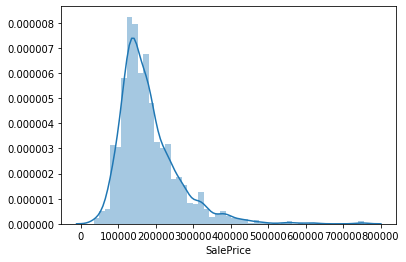

In [6]:
sns.distplot(train.SalePrice)

The target column no have a simetric distribution, normaly, it slow down the perfomance.

But this column have only positive values and possibly outliers, this a optmal cenary to use a logaritmic tranform, because this transformation "push" the distribution to the right.

In [7]:
tcol = TransformColumn({'SalePrice': np.log1p})

In [8]:
train = tcol.transform(train)

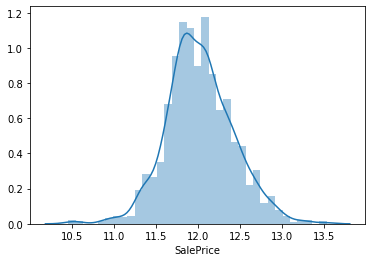

In [9]:
sns.distplot(train.SalePrice)

Will be separate the columns by type to facility the analysis

The only non-ordinal columns, this columns will stay separate the rest of the dataset, in the final model we test this columns.

## NaN Values

Will be input non observed data for some columns

In [10]:
aux_nan = train.isna().mean().sort_values(ascending = False)
aux_nan = aux_nan[aux_nan > 0]
aux_nan

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageYrBlt     0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [11]:
def mode(x):
    return stats.mode(x).mode[0]

In [12]:
nan_impute = {
    'LotFrontage': ('Neighborhood', np.mean),
    'MasVnrArea': ('Neighborhood', np.mean),
    'Functional': 'Typ',
    'Electrical': 'SBrkr',
    'KitchenQual': 'TA',
    'MSZoning': ('MSSubClass', mode)
}

In [13]:
t_input = TransformImputer(nan_impute, not_input = ['SalePrice'])
pipeline.append(t_input)

In [14]:
train = t_input.fit_transform(train)

In [15]:
aux_nan = train.isna().mean().sort_values(ascending = False)
aux_nan = aux_nan[aux_nan > 0]
aux_nan

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrType      0.005479
dtype: float64

## Ordinal columns

For ordinal columns will be transform to numeric colmun.

In [16]:
ordinal_cols = {
    'Street':['Grvl','Pave'],
    'LotShape':['Reg','IR1','IR2','IR3'],
    'Utilities':['AllPub','NoSewr','NoSeWa','ELO','NAN'],
    'LandSlope':['Gtl','Mod','Sev'],
    'BldgType':['1Fam','2fmCon','Duplex','Twnhs','TwnhsE'],
    'ExterQual':['Ex','Gd','TA','Fa','Po'],
    'ExterCond':['Ex','Gd','TA','Fa','Po'],
    'BsmtQual':['Ex','Gd','TA','Fa','Po','NAN'],
    'BsmtCond':['Ex','Gd','TA','Fa','Po','NAN'],
    'BsmtExposure':['Gd','Av','Mn','No','NAN'],
    'BsmtFinType1':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NAN'],
    'BsmtFinType2':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NAN'],
    'HeatingQC':['Ex','Gd','TA','Fa','Po'],
    'CentralAir':['N','Y'],
    'KitchenQual':['Ex','Gd','TA','Fa','Po','NAN'],
    'FireplaceQu':['Ex','Gd','TA','Fa','Po','NAN'],
    'GarageFinish':['Fin','RFn','Unf','NAN'],
    'GarageQual':['Ex','Gd','TA','Fa','Po','NAN'],
    'GarageCond':['Ex','Gd','TA','Fa','Po','NAN'],
    'PavedDrive':['Y','P','N'],
    'PoolQC':['Ex','Gd','TA','Fa','NAN'],
    'Fence':['GdPrv','MnPrv','GdWo','MnWw','NAN'],
}

In [17]:
tord = OrdinalEncoder(ordinal_cols)
pipeline.append(tord)

In [18]:
train = tord.transform(train)

In [19]:
train[ordinal_cols.keys()].head(5)

,Street,LotShape,Utilities,LandSlope,BldgType,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,1,0,0,0,0,1,2,1,2,3,...,0,1,1,5,1,2,2,0,4,4
1,1,0,0,0,0,2,2,1,2,0,...,0,1,2,2,1,2,2,0,4,4
2,1,1,0,0,0,1,2,1,2,2,...,0,1,1,2,1,2,2,0,4,4
3,1,1,0,0,0,2,2,2,1,3,...,1,1,1,1,2,2,2,0,4,4
4,1,1,0,0,0,1,2,1,2,1,...,0,1,1,2,1,2,2,0,4,4


In [20]:
aux_nan = train.isna().mean().sort_values(ascending = False)
aux_nan = aux_nan[aux_nan > 0]
aux_nan

MiscFeature    0.963014
Alley          0.937671
GarageType     0.055479
MasVnrType     0.005479
dtype: float64

## Nominal columns

In [21]:
train.select_dtypes(np.object).head(5)

,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,MiscFeature,SaleType,SaleCondition
0,RL,NaN,Lvl,Inside,CollgCr,Norm,Norm,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
1,RL,NaN,Lvl,FR2,Veenker,Feedr,Norm,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
2,RL,NaN,Lvl,Inside,CollgCr,Norm,Norm,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal
3,RL,NaN,Lvl,Corner,Crawfor,Norm,Norm,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,NaN,WD,Abnorml
4,RL,NaN,Lvl,FR2,NoRidge,Norm,Norm,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,NaN,WD,Normal


In [22]:
t_others = TransformOthers()
pipeline.append(t_others)
t_others.fit(train)

In [23]:
t_others.relevant_values

{'MSZoning': ['FV', 'RH', 'RL', 'RM'],
 'Alley': ['Grvl', 'Pave'],
 'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'],
 'LotConfig': ['Corner', 'CulDSac', 'FR2', 'Inside'],
 'Neighborhood': ['Blmngtn',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'IDOTRR',
  'MeadowV',
  'Mitchel',
  'NAmes',
  'NWAmes',
  'NoRidge',
  'NridgHt',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW',
  'Somerst',
  'StoneBr',
  'Timber'],
 'Condition1': ['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'],
 'Condition2': ['Norm'],
 'HouseStyle': ['1.5Fin', '1Story', '2Story', 'SFoyer', 'SLvl'],
 'RoofStyle': ['Gable', 'Hip'],
 'RoofMatl': ['CompShg'],
 'Exterior1st': ['AsbShng',
  'BrkFace',
  'CemntBd',
  'HdBoard',
  'MetalSd',
  'Plywood',
  'Stucco',
  'VinylSd',
  'Wd Sdng',
  'WdShing'],
 'Exterior2nd': ['AsbShng',
  'BrkFace',
  'CmentBd',
  'HdBoard',
  'MetalSd',
  'Plywood',
  'Stucco',
  'VinylSd',
  'Wd Sdng',
  'Wd Shng'],
 'MasVnrType': ['BrkCmn', 'BrkFace', 'Non

In [24]:
train = t_others.transform(train)

## Numerical columns

Create new columns

In [25]:
new_cols = {
    'TotalBath': 'BsmtFullBath + 0.5*BsmtHalfBath + FullBath + 0.5*HalfBath',
    'TotalSqrFootage': 'BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF',
    'TotalPorch': 'OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF'
}
t_newcol = TransformNewColumn(new_cols)
pipeline.append(t_newcol)

In [26]:
train = t_newcol.transform(train)

In [27]:
train[['TotalBath', 'TotalSqrFootage', 'TotalPorch']].describe()

,TotalBath,TotalSqrFootage,TotalPorch
count,1460.000000,1460.000000,1460.000000
mean,2.210616,1999.808219,181.329452
std,0.785399,773.992942,156.656097
min,1.000000,334.000000,0.000000
25%,2.000000,1493.000000,45.000000
50%,2.000000,1863.500000,164.000000
75%,2.500000,2383.500000,266.000000
max,6.000000,11286.000000,1027.000000


Now the objective is a discover the colums wich interessing to transform in binary columns.

This coluns problably will be bad features to model, so will binarize this columns.

In [28]:
t_bin = TransformBinary()
pipeline.append(t_bin)

In [29]:
train = t_bin.fit_transform(train)

In [30]:
t_bin.cols_bin

['bin_MSZoning_RL',
 'bin_Alley_Others',
 'bin_LotShape_0',
 'bin_LandContour_Lvl',
 'bin_LotConfig_Inside',
 'bin_LandSlope_0',
 'bin_Condition1_Norm',
 'bin_BldgType_0',
 'bin_OverallCond_5',
 'bin_RoofStyle_Gable',
 'bin_MasVnrType_None',
 'bin_MasVnrArea_0.0',
 'bin_ExterQual_2',
 'bin_ExterCond_2',
 'bin_BsmtCond_2',
 'bin_BsmtExposure_3',
 'bin_BsmtFinType2_5',
 'bin_BsmtFinSF2_0',
 'bin_HeatingQC_0',
 'bin_CentralAir_1',
 'bin_Electrical_SBrkr',
 'bin_2ndFlrSF_0',
 'bin_BsmtFullBath_0',
 'bin_BsmtHalfBath_0',
 'bin_FullBath_2',
 'bin_HalfBath_0',
 'bin_BedroomAbvGr_3',
 'bin_KitchenQual_2',
 'bin_Functional_Typ',
 'bin_GarageType_Attchd',
 'bin_GarageCars_2',
 'bin_GarageQual_2',
 'bin_GarageCond_2',
 'bin_PavedDrive_0',
 'bin_WoodDeckSF_0',
 'bin_EnclosedPorch_0',
 'bin_ScreenPorch_0',
 'bin_Fence_4',
 'bin_SaleType_WD',
 'bin_SaleCondition_Normal']

In [31]:
t_bin.cols_drop

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

In [32]:
train.head(5)

,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,bin_GarageCars_2,bin_GarageQual_2,bin_GarageCond_2,bin_PavedDrive_0,bin_WoodDeckSF_0,bin_EnclosedPorch_0,bin_ScreenPorch_0,bin_Fence_4,bin_SaleType_WD,bin_SaleCondition_Normal
0,60,65.0,8450,CollgCr,2Story,7,2003,2003,VinylSd,VinylSd,...,1,1,1,1,1,1,1,1,1,1
1,20,80.0,9600,Others,1Story,6,1976,1976,MetalSd,MetalSd,...,1,1,1,1,0,1,1,1,1,1
2,60,68.0,11250,CollgCr,2Story,7,2001,2002,VinylSd,VinylSd,...,1,1,1,1,1,1,1,1,1,1
3,70,60.0,9550,Crawfor,2Story,7,1915,1970,Wd Sdng,Wd Shng,...,0,1,1,1,1,0,1,1,1,0
4,60,84.0,14260,NoRidge,2Story,8,2000,2000,VinylSd,VinylSd,...,0,1,1,1,0,1,1,1,1,1


The first objective is to research the columns that can cause mulcholinearity problem.

This columns will be separated to test in the final model.

## Test dataset

In [33]:
pipeline

[TransformImputer(mapping={'1stFlrSF': <function amin at 0x7ff026d04d90>,
                           '2ndFlrSF': <function amin at 0x7ff026d04d90>,
                           '3SsnPorch': <function amin at 0x7ff026d04d90>,
                           'BedroomAbvGr': <function amin at 0x7ff026d04d90>,
                           'BsmtFinSF1': <function amin at 0x7ff026d04d90>,
                           'BsmtFinSF2': <function amin at 0x7ff026d04d90>,
                           'BsmtFullBath': <function amin at 0x7ff026d04d90>,
                           'BsmtHalfBath': <f...
                           'MSSubClass': <function amin at 0x7ff026d04d90>,
                           'MSZoning': ('MSSubClass',
                                        <function mode at 0x7ff0106037b8>),
                           'MasVnrArea': ('Neighborhood',
                                          <function mean at 0x7ff026d06598>),
                           'MiscVal': <function amin at 0x7ff026d04d90>,
     

In [34]:
for func in pipeline:
    test = func.transform(test)

In [35]:
test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,...,bin_GarageCars_2,bin_GarageQual_2,bin_GarageCond_2,bin_PavedDrive_0,bin_WoodDeckSF_0,bin_EnclosedPorch_0,bin_ScreenPorch_0,bin_Fence_4,bin_SaleType_WD,bin_SaleCondition_Normal
0,1,60,65.0,8450,CollgCr,2Story,7,2003,2003,VinylSd,...,1,1,1,1,1,1,1,1,1,1
1,2,20,80.0,9600,Others,1Story,6,1976,1976,MetalSd,...,1,1,1,1,0,1,1,1,1,1
2,3,60,68.0,11250,CollgCr,2Story,7,2001,2002,VinylSd,...,1,1,1,1,1,1,1,1,1,1
3,4,70,60.0,9550,Crawfor,2Story,7,1915,1970,Wd Sdng,...,0,1,1,1,1,0,1,1,1,0
4,5,60,84.0,14260,NoRidge,2Story,8,2000,2000,VinylSd,...,0,1,1,1,0,1,1,1,1,1


In [36]:
import pandas as pd

In [37]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [38]:
train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,...,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab
0,60,65.0,8450,7,2003,2003,1,0,706,150,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,1976,1976,1,1,978,284,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250,7,2001,2002,1,0,486,434,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,1915,1970,2,1,216,540,...,0,0,0,0,1,1,0,0,0,0
4,60,84.0,14260,8,2000,2000,1,0,655,490,...,0,0,1,0,0,0,0,0,1,0


In [39]:
import xgboost as xgb
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
train_test_split.__name__

'train_test_split'

In [40]:
def rmse(y_true, y_pred):       
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [41]:
xg = xgb.XGBRegressor()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns='SalePrice'),train['SalePrice'],
                                                    train_size=0.75, test_size=0.25)

In [48]:
xg.fit(X_train, y_train)

/home/dobraga/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
rmse(np.expm1(xg.predict(X_test)), np.expm1(y_test))

31142.306791747927

In [56]:
np.expm1(xg.predict(X_test))

array([152405.58 , 182527.95 , 135163.28 , 160322.69 , 166252.95 ,
       149301.92 , 240171.67 , 158557.8  ,  85671.555, 190681.19 ,
       105973.66 ,  42149.43 , 210363.   , 143484.34 , 133737.2  ,
        46378.406, 112938.91 , 147036.69 , 100090.28 , 127621.88 ,
       155707.2  , 139131.31 , 157741.69 , 276373.6  , 116295.86 ,
       211684.   , 118439.4  , 400345.4  , 313590.53 , 106208.59 ,
       323972.34 , 140384.84 , 186414.55 , 203289.1  ,  99389.81 ,
       141924.44 , 144817.55 , 240436.83 , 178302.06 , 144823.08 ,
       132055.75 , 133839.78 , 131444.72 , 146019.8  , 155278.5  ,
       193742.   ,  97637.67 , 146301.64 , 170057.97 , 407061.22 ,
       114546.14 ,  96685.125, 255863.2  , 220330.78 ,  99329.92 ,
       160842.9  , 343335.94 , 147903.44 , 101680.734, 459740.53 ,
       128717.21 ,  94238.99 , 159375.84 , 111799.11 , 170359.23 ,
       147308.83 , 107146.086, 212969.81 , 193827.56 , 178296.1  ,
       289714.97 , 157086.11 , 120007.2  , 115554.48 ,  77123.